Assumption : Long Window >= Short Window * 3

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from dataset_constructor import MarketData
from strategy.inidicator_based.moving_average_strategy import MovingAverageCrossoverStrategy
from backtest import Backtest
from visualization.visualize_backtest import visualize_backtest

import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

Date: 2018-03-05 00:00:00, Position: Long, Entry Price: 11456.2908, Market Price: 11454.0000, Contract Numbers: 0.87, Cash: 0.00, Portfolio Value: 9998.00
Date: 2018-03-31 00:00:00, Position: Flat, Entry Price: N/A, Market Price: 6923.9100, Contract Numbers: 0.00, Cash: 6042.55, Portfolio Value: 6042.55
Date: 2019-04-24 00:00:00, Position: Long, Entry Price: 5416.0830, Market Price: 5415.0000, Contract Numbers: 1.12, Cash: 0.00, Portfolio Value: 6041.35
Date: 2019-10-26 00:00:00, Position: Flat, Entry Price: N/A, Market Price: 9230.0000, Contract Numbers: 0.00, Cash: 10295.56, Portfolio Value: 10295.56
Date: 2020-02-18 00:00:00, Position: Long, Entry Price: 10166.7429, Market Price: 10164.7100, Contract Numbers: 1.01, Cash: 0.00, Portfolio Value: 10293.50
Date: 2020-03-25 00:00:00, Position: Flat, Entry Price: N/A, Market Price: 6677.4300, Contract Numbers: 0.00, Cash: 6760.68, Portfolio Value: 6760.68
Date: 2020-05-21 00:00:00, Position: Long, Entry Price: 9070.4637, Market Price: 906

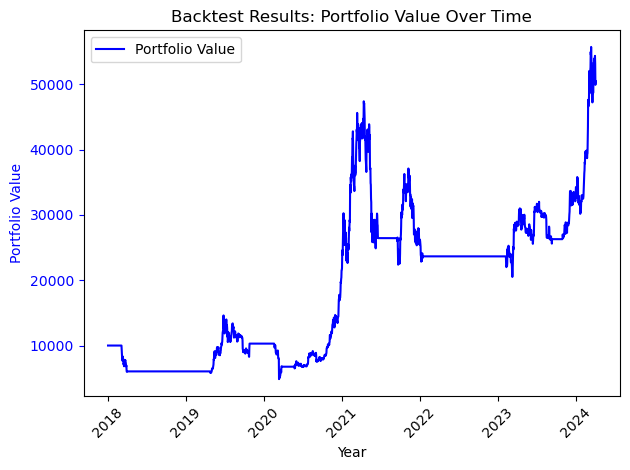

In [2]:
file_path = '../../data/crypto/csv/BTC_USDT_1d.csv'
market_data = MarketData(file_path)

# Initialize and run the strategy
ma_strategy = MovingAverageCrossoverStrategy(market_data.data)
backtest = Backtest(market_data.data, ma_strategy, start_date='2018-01-01', end_date=None, fee=2e-4, enable_logging=True)
# Assuming backtest and initial_capital are already defined
backtest.run()
portfolio = backtest.simulate_trades(initial_capital=10000)
metrics = backtest.calculate_metrics()

# Output metrics
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Visualize the backtest
visualize_backtest(portfolio)